# 2017 Data

In [1]:
import os
import datetime
from random import seed
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import models
from tensorflow.keras import layers

In [2]:
seed(36)

In [3]:
df = pd.read_csv("compiled_data_jer_edit 2017.csv")
df

,Unnamed: 0,index,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro,Waterlevel_Sto_Nino,Waterlevel_Montalban,Discharge_Sto_Nino,Discharge_San_Jose,Cross_Section_Sto_Nino,Cross_Section_Montalban,Velocity_Sto_Nino,Velocity_Montalban,datetime,t,x
0,0,0,0,1,1,0,0,12.53,21.39,22695.465738,25325.458412,826.98,641.7,27.443790,39.466197,2017-01-01 00:00:00,0.0,14420
1,1,365,0,0,0,1,0,12.53,21.39,22695.465738,25325.458412,826.98,641.7,27.443790,39.466197,2017-01-01 01:00:00,3600.0,14420
2,2,730,0,0,0,0,0,12.53,21.39,22695.465738,25325.458412,826.98,641.7,27.443790,39.466197,2017-01-01 02:00:00,7200.0,14420
3,3,1095,0,0,1,1,0,12.53,21.39,22695.465738,25325.458412,826.98,641.7,27.443790,39.466197,2017-01-01 03:00:00,10800.0,14420
4,4,1460,0,0,0,0,0,12.53,21.39,22695.465738,25325.458412,826.98,641.7,27.443790,39.466197,2017-01-01 04:00:00,14400.0,14420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,7299,0,0,0,0,0,12.44,21.18,18796.031116,7089.803959,821.04,635.4,22.892954,11.158017,2017-12-31 19:00:00,31518000.0,14420
8756,8756,7664,0,0,0,0,0,12.44,21.18,18796.031116,7089.803959,821.04,635.4,22.892954,11.158017,2017-12-31 20:00:00,31521600.0,14420
8757,8757,8029,0,0,0,0,0,12.44,21.18,18796.031116,7089.803959,821.04,635.4,22.892954,11.158017,2017-12-31 21:00:00,31525200.0,14420
8758,8758,8394,0,0,0,0,0,12.44,21.18,18796.031116,7089.803959,821.04,635.4,22.892954,11.158017,2017-12-31 22:00:00,31528800.0,14420


In [4]:
df['datetime'] = pd.to_datetime(df['datetime'], infer_datetime_format=True)


In [5]:
n = len(df)
test = df[int(n*0.9):]
test_dates = test['datetime']
test_dates

7884   2017-11-25 12:00:00
7885   2017-11-25 13:00:00
7886   2017-11-25 14:00:00
7887   2017-11-25 15:00:00
7888   2017-11-25 16:00:00
               ...        
8755   2017-12-31 19:00:00
8756   2017-12-31 20:00:00
8757   2017-12-31 21:00:00
8758   2017-12-31 22:00:00
8759   2017-12-31 23:00:00
Name: datetime, Length: 876, dtype: datetime64[ns]

In [6]:
df = df[['Waterlevel_Sto_Nino', 'Rainfall_Aries', 'Rainfall_Boso', 'Rainfall_Campana', 'Rainfall_Nangka', 'Rainfall_Oro']]
df

,Waterlevel_Sto_Nino,Rainfall_Aries,Rainfall_Boso,Rainfall_Campana,Rainfall_Nangka,Rainfall_Oro
0,12.53,0,1,1,0,0
1,12.53,0,0,0,1,0
2,12.53,0,0,0,0,0
3,12.53,0,0,1,1,0
4,12.53,0,0,0,0,0
...,...,...,...,...,...,...
8755,12.44,0,0,0,0,0
8756,12.44,0,0,0,0,0
8757,12.44,0,0,0,0,0
8758,12.44,0,0,0,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Waterlevel_Sto_Nino  8760 non-null   float64
 1   Rainfall_Aries       8760 non-null   int64  
 2   Rainfall_Boso        8760 non-null   int64  
 3   Rainfall_Campana     8760 non-null   int64  
 4   Rainfall_Nangka      8760 non-null   int64  
 5   Rainfall_Oro         8760 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 410.8 KB


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Waterlevel_Sto_Nino,8760.0,12.295843,0.554816,11.46,11.82,12.255,12.53,16.04
Rainfall_Aries,8760.0,0.264840,1.906885,0.00,0.00,0.000,0.00,63.00
Rainfall_Boso,8760.0,0.256507,1.910506,0.00,0.00,0.000,0.00,50.00
Rainfall_Campana,8760.0,0.247717,1.706801,0.00,0.00,0.000,0.00,50.00
Rainfall_Nangka,8760.0,0.307763,2.310577,0.00,0.00,0.000,0.00,62.00
Rainfall_Oro,8760.0,0.311073,2.526745,0.00,0.00,0.000,0.00,129.00


In [9]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]
num_features

6

In [10]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.utils.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    # properties to access them as tf datasets
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

    def plot(self, model=None, plot_col='Waterlevel_Sto_Nino', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col}')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')


In [11]:
wide_window = WindowGenerator(input_width = 6, label_width = 6, shift = 1, label_columns = ['Waterlevel_Sto_Nino'])
wide_window


Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [1 2 3 4 5 6]
Label column name(s): ['Waterlevel_Sto_Nino']

In [12]:
# Dense Neural Network
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', dense(wide_window.example[0]).shape)

Input shape: (32, 6, 6)
Output shape: (32, 6, 1)


In [13]:
def r_square(y_true, y_pred):
    x = y_true
    y = y_pred
    mx = K.mean(x, axis=0)
    my = K.mean(y, axis=0)
    xm, ym = x - mx, y - my
    r_num = K.square(K.sum(xm * ym))
    x_square_sum = K.sum(xm * xm)
    y_square_sum = K.sum(ym * ym)
    r_den = (x_square_sum * y_square_sum) + K.epsilon()
    
    r = r_num / r_den
    return r
def NSE(y_true, y_pred):
    '''
    This is the Nash-Sutcliffe Efficiency Coefficient
    '''
    y_pred = K.flatten(y_pred)
    y_true = K.flatten(y_true)

    
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [14]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanSquaredError(), r_square, NSE])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [15]:
val_performance = {}
performance = {}
dense_history = compile_and_fit(dense, wide_window)
val_performance['Dense'] = dense.evaluate(wide_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(wide_window.test, verbose=0, return_dict=True)




Epoch 1/20
192/192 [==============================] - 2s 3ms/step - loss: 8.9234 - mean_squared_error: 8.9234 - r_square: 0.6869 - NSE: -44.0179 - val_loss: 0.0169 - val_mean_squared_error: 0.0169 - val_r_square: 0.8856 - val_NSE: 0.8576
Epoch 2/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0136 - mean_squared_error: 0.0136 - r_square: 0.9561 - NSE: 0.9494 - val_loss: 0.0112 - val_mean_squared_error: 0.0112 - val_r_square: 0.9209 - val_NSE: 0.9072
Epoch 3/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0061 - mean_squared_error: 0.0061 - r_square: 0.9765 - NSE: 0.9746 - val_loss: 0.0110 - val_mean_squared_error: 0.0110 - val_r_square: 0.9306 - val_NSE: 0.9148
Epoch 4/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0050 - mean_squared_error: 0.0050 - r_square: 0.9797 - NSE: 0.9777 - val_loss: 0.0119 - val_mean_squared_error: 0.0119 - val_r_square: 0.9176 - val_NSE: 0.8926
Epoch 5/20
55/55 [==============================] - 0s

In [16]:
val_performance

{'Dense': {'loss': 0.01099435519427061,
  'mean_squared_error': 0.010994351468980312,
  'r_square': 0.9305403232574463,
  'NSE': 0.9127164483070374}}

28/28 [==============================] - 0s 864us/step


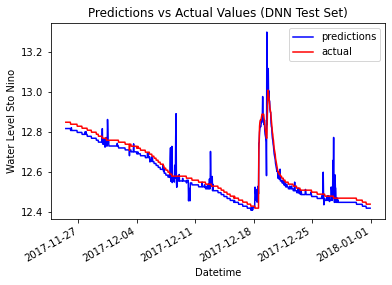

In [17]:
dense_predictions = dense.predict(test_df)
actual = test_df['Waterlevel_Sto_Nino']
from matplotlib import pyplot as plt
import matplotlib.dates as mdates  # Import the dates module

plt.plot(test_dates, dense_predictions, c = "blue", label = "predictions")
plt.plot(test_dates, actual, c = "red", label = "actual")
plt.title('Predictions vs Actual Values (DNN Test Set)')
plt.ylabel('Water Level Sto Nino')
plt.xlabel('Datetime')

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))  # Show ticks on Mondays
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the dates as YYYY-MM-DD
plt.gcf().autofmt_xdate()  # Rotate and align the x-axis labels
plt.legend()
plt.show()

In [18]:
dense_history.history

{'loss': [8.923351287841797,
  0.013599193654954433,
  0.006085890345275402,
  0.005004154518246651,
  0.004488030448555946],
 'mean_squared_error': [8.923352241516113,
  0.01359918899834156,
  0.006085890345275402,
  0.005004154983907938,
  0.004488029051572084],
 'r_square': [0.6868798136711121,
  0.9561272263526917,
  0.9765353202819824,
  0.9797011017799377,
  0.9833641052246094],
 'NSE': [-44.01790237426758,
  0.9493595957756042,
  0.9745876789093018,
  0.9777321815490723,
  0.9817410111427307],
 'val_loss': [0.01693112775683403,
  0.01123382430523634,
  0.010964066721498966,
  0.011902139522135258,
  0.010994353331625462],
 'val_mean_squared_error': [0.01693112589418888,
  0.011233825236558914,
  0.010964065790176392,
  0.011902139522135258,
  0.010994354262948036],
 'val_r_square': [0.8856205344200134,
  0.9209163188934326,
  0.9305729269981384,
  0.9176004528999329,
  0.9273825883865356],
 'val_NSE': [0.8576127290725708,
  0.907195508480072,
  0.9147656559944153,
  0.8925659060

In [19]:
val_performance

{'Dense': {'loss': 0.01099435519427061,
  'mean_squared_error': 0.010994351468980312,
  'r_square': 0.9305403232574463,
  'NSE': 0.9127164483070374}}

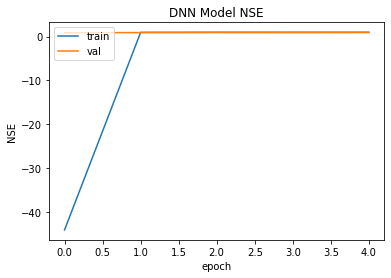

In [20]:
import keras
from matplotlib import pyplot as plt
plt.plot(dense_history.history['NSE'])
plt.plot(dense_history.history['val_NSE'])
plt.title('DNN Model NSE')
plt.ylabel('NSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
val_performance

{'Dense': {'loss': 0.01099435519427061,
  'mean_squared_error': 0.010994351468980312,
  'r_square': 0.9305403232574463,
  'NSE': 0.9127164483070374}}

In [22]:
# Convolution Neural Network (CNN)
CONV_WIDTH = 6

conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['Waterlevel_Sto_Nino'])

conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)
conv_model.summary()



Conv model on `conv_window`
Input shape: (32, 6, 6)
Output shape: (32, 1, 1)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (32, 1, 64)               2368      
                                                                 
 dense_4 (Dense)             (32, 1, 64)               4160      
                                                                 
 dense_5 (Dense)             (32, 1, 64)               4160      
                                                                 
 dense_6 (Dense)             (32, 1, 1)                65        
                                                                 
Total params: 10753 (42.00 KB)
Trainable params: 10753 (42.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
conv_window

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Waterlevel_Sto_Nino']

In [31]:
conv_history = compile_and_fit(conv_model, conv_window)

val_performance['Conv'] = conv_model.evaluate(conv_window.val, return_dict=True)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0, return_dict=True)

Epoch 1/20
192/192 [==============================] - 1s 3ms/step - loss: 0.0370 - mean_squared_error: 0.0370 - r_square: 0.9417 - NSE: 0.8260 - val_loss: 0.0270 - val_mean_squared_error: 0.0270 - val_r_square: 0.8825 - val_NSE: 0.7856
Epoch 2/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0246 - mean_squared_error: 0.0246 - r_square: 0.9377 - NSE: 0.8801 - val_loss: 0.0210 - val_mean_squared_error: 0.0210 - val_r_square: 0.8955 - val_NSE: 0.8325
Epoch 3/20
192/192 [==============================] - 0s 2ms/step - loss: 0.0270 - mean_squared_error: 0.0270 - r_square: 0.9423 - NSE: 0.8814 - val_loss: 0.0419 - val_mean_squared_error: 0.0419 - val_r_square: 0.8207 - val_NSE: 0.6026
Epoch 4/20
55/55 [==============================] - 0s 1ms/step - loss: 0.0211 - mean_squared_error: 0.0211 - r_square: 0.9092 - NSE: 0.7990


In [32]:
performance

{'Dense': {'loss': 0.0033799351658672094,
  'mean_squared_error': 0.0033799349330365658,
  'r_square': 0.9583664536476135,
  'NSE': 0.8094621300697327},
 'Conv': {'loss': 0.012341306544840336,
  'mean_squared_error': 0.012341306544840336,
  'r_square': 0.9332770705223083,
  'NSE': 0.2943846583366394}}

In [33]:
prediction_data = test_df.values.reshape(1, -1, CONV_WIDTH)  # Add batch dimension of 1
conv_predictions = conv_model.predict(prediction_data)
actual = test_df['Waterlevel_Sto_Nino']

1/1 [==============================] - 0s 103ms/step


In [34]:
# reshape the conv_predictions array
# delete the first 5 values of the actual and test_dates arrays (corresponding to t = 0 to 4)

conv_predictions = conv_predictions.reshape(871)
actual = actual[5:]
test_dates_cnn = test_dates[5:]


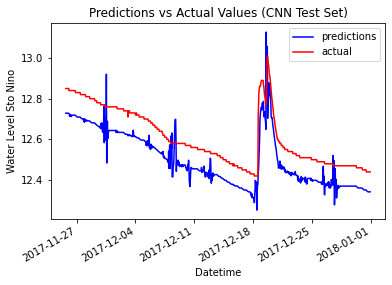

In [35]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates  # Import the dates module

plt.plot(test_dates_cnn, conv_predictions, c = "blue", label = "predictions")
plt.plot(test_dates_cnn, actual, c = "red", label = "actual")
plt.title('Predictions vs Actual Values (CNN Test Set)')
plt.ylabel('Water Level Sto Nino')
plt.xlabel('Datetime')

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))  # Show ticks on Mondays
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the dates as YYYY-MM-DD
plt.gcf().autofmt_xdate()  # Rotate and align the x-axis labels
plt.legend()
plt.show()

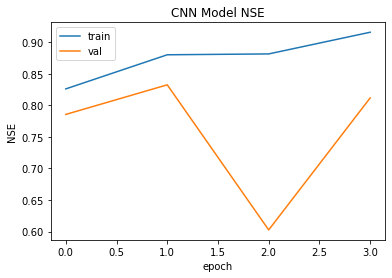

In [36]:
import keras
from matplotlib import pyplot as plt
plt.plot(conv_history.history['NSE'])
plt.plot(conv_history.history['val_NSE'])
plt.title('CNN Model NSE')
plt.ylabel('NSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
# LSTM / RNN

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 6, 6)
Output shape: (32, 6, 1)


In [41]:
lstm_history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val, return_dict=True)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0, return_dict=True)

Epoch 1/20
192/192 [==============================] - 3s 8ms/step - loss: 0.0332 - mean_squared_error: 0.0332 - r_square: 0.9823 - NSE: 0.8612 - val_loss: 0.0115 - val_mean_squared_error: 0.0115 - val_r_square: 0.9238 - val_NSE: 0.9088
Epoch 2/20
192/192 [==============================] - 1s 5ms/step - loss: 0.0043 - mean_squared_error: 0.0043 - r_square: 0.9859 - NSE: 0.9836 - val_loss: 0.0116 - val_mean_squared_error: 0.0116 - val_r_square: 0.9227 - val_NSE: 0.9086
Epoch 3/20
192/192 [==============================] - 1s 5ms/step - loss: 0.0046 - mean_squared_error: 0.0046 - r_square: 0.9856 - NSE: 0.9822 - val_loss: 0.0100 - val_mean_squared_error: 0.0100 - val_r_square: 0.9315 - val_NSE: 0.9175
Epoch 4/20
192/192 [==============================] - 1s 5ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - r_square: 0.9843 - NSE: 0.9802 - val_loss: 0.0110 - val_mean_squared_error: 0.0110 - val_r_square: 0.9165 - val_NSE: 0.9075
Epoch 5/20
192/192 [==============================] - 1s

In [42]:
prediction_data = test_df.values.reshape(1, -1, 6)  # Add batch dimension of 1
lstm_predictions = lstm_model.predict(prediction_data)
actual = test_df['Waterlevel_Sto_Nino']

1/1 [==============================] - 0s 400ms/step


In [47]:
print(lstm_predictions.shape)
lstm_predictions = lstm_predictions.reshape(876)
print(actual.shape)
print(lstm_predictions.shape)


(876,)
(876,)
(876,)


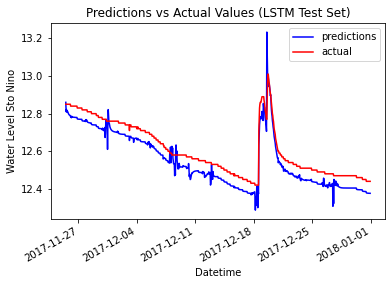

In [48]:
from matplotlib import pyplot as plt
import matplotlib.dates as mdates  # Import the dates module

plt.plot(test_dates, lstm_predictions, c = "blue", label = "predictions")
plt.plot(test_dates, actual, c = "red", label = "actual")
plt.title('Predictions vs Actual Values (LSTM Test Set)')
plt.ylabel('Water Level Sto Nino')
plt.xlabel('Datetime')

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))  # Show ticks on Mondays
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the dates as YYYY-MM-DD
plt.gcf().autofmt_xdate()  # Rotate and align the x-axis labels
plt.legend()
plt.show()

In [49]:
performance

{'Dense': {'loss': 0.0033799351658672094,
  'mean_squared_error': 0.0033799349330365658,
  'r_square': 0.9583664536476135,
  'NSE': 0.8094621300697327},
 'Conv': {'loss': 0.012341306544840336,
  'mean_squared_error': 0.012341306544840336,
  'r_square': 0.9332770705223083,
  'NSE': 0.2943846583366394},
 'LSTM': {'loss': 0.0013348710490390658,
  'mean_squared_error': 0.0013348706997931004,
  'r_square': 0.9645887613296509,
  'NSE': 0.9279705882072449}}

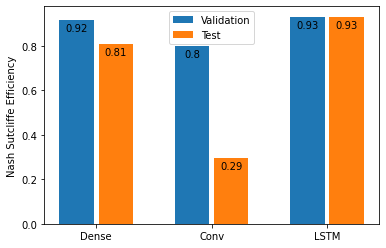

In [57]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'NSE'
val_nse = [v[metric_name] for v in val_performance.values()]
test_nse = [v[metric_name] for v in performance.values()]
for i, v in enumerate(val_nse):
    plt.text(x[i] - 0.17, v - 0.05, str(round(v,2)), ha='center')  # Validation labels
for i, v in enumerate(test_nse):
    plt.text(x[i] + 0.17, v - 0.05, str(round(v,2)), ha='center')  # Test labels
plt.ylabel('Nash Sutcliffe Efficiency')
plt.bar(x - 0.17, val_nse, width, label='Validation')
plt.bar(x + 0.17, test_nse, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys())
plt.legend()
plt.show()

In [55]:
# NSE values of the testing set

for name, value in performance.items():
    print(f'{name:12s}: {value[metric_name]:0.4f}')

Dense       : 0.8095
Conv        : 0.2944
LSTM        : 0.9280


## Multi-step models
- Uses the past 12 hours of data to predict the water level 6 hours into the future

In [33]:
OUT_STEPS = 6
multi_window = WindowGenerator(input_width=12,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window

Total window size: 18
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Label indices: [12 13 14 15 16 17]
Label column name(s): None

In [34]:
multi_val_performance = {}
multi_performance = {}

In [38]:
# Single Shot Model: The model makes the entire prediction in one step

multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0, return_dict=True)


55/55 [==============================] - 0s 1ms/step - loss: 3.6164 - mean_squared_error: 3.6164 - r_square: 0.0739 - NSE: 0.8654


In [36]:
multi_performance

{'Dense': {'loss': 0.5330066084861755,
  'mean_squared_error': 0.5330066084861755,
  'r_square': 0.06871860474348068,
  'NSE': 0.9760781526565552}}

In [39]:
CONV_WIDTH = 12
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(64, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val, return_dict=True)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0, return_dict=True)

Epoch 1/20
192/192 [==============================] - 2s 3ms/step - loss: 6.6974 - mean_squared_error: 6.6974 - r_square: 0.0313 - NSE: 0.7298 - val_loss: 3.8030 - val_mean_squared_error: 3.8030 - val_r_square: 0.0186 - val_NSE: 0.8563
Epoch 2/20
192/192 [==============================] - 0s 2ms/step - loss: 4.0675 - mean_squared_error: 4.0675 - r_square: 0.0741 - NSE: 0.8460 - val_loss: 3.6908 - val_mean_squared_error: 3.6908 - val_r_square: 0.0532 - val_NSE: 0.8611
Epoch 3/20
192/192 [==============================] - 0s 2ms/step - loss: 3.9979 - mean_squared_error: 3.9979 - r_square: 0.0734 - NSE: 0.8475 - val_loss: 3.7017 - val_mean_squared_error: 3.7017 - val_r_square: 0.0632 - val_NSE: 0.8605
Epoch 4/20
192/192 [==============================] - 0s 2ms/step - loss: 3.9757 - mean_squared_error: 3.9757 - r_square: 0.0910 - NSE: 0.8493 - val_loss: 3.6888 - val_mean_squared_error: 3.6888 - val_r_square: 0.0659 - val_NSE: 0.8670
Epoch 5/20
192/192 [==============================] - 0s

In [42]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val, return_dict=True)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0, return_dict=True)

55/55 [==============================] - 0s 3ms/step - loss: 3.6590 - mean_squared_error: 3.6590 - r_square: 0.0628 - NSE: 0.8617


In [43]:
# Autoregressive model : decomposes the prediction into individual time steps, you use the output for the next prediction
# Autoregressive LSTM/RNN

class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(num_features)

    def warmup(self, inputs):
        # inputs.shape => (batch, time, features)
        # x.shape => (batch, lstm_units)
        x, *state = self.lstm_rnn(inputs)

        # predictions.shape => (batch, features)
        prediction = self.dense(x)
        return prediction, state
    
    
    def call(self, inputs, training=None):
        # Use a TensorArray to capture dynamically unrolled outputs.
        predictions = []
        # Initialize the LSTM state.
        prediction, state = self.warmup(inputs)

        # Insert the first prediction.
        predictions.append(prediction)

        # Run the rest of the prediction steps.
        for n in range(1, self.out_steps):
            # Use the last prediction as input.
            x = prediction
            # Execute one lstm step.
            x, state = self.lstm_cell(x, states=state,
                                      training=training)
            # Convert the lstm output to a prediction.
            prediction = self.dense(x)
            # Add the prediction to the output.
            predictions.append(prediction)

        # predictions.shape => (time, batch, features)
        predictions = tf.stack(predictions)
        # predictions.shape => (batch, time, features)
        predictions = tf.transpose(predictions, [1, 0, 2])
        return predictions




In [44]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 6])

In [45]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)


Output shape (batch, time, features):  (32, 6, 6)


In [51]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val, return_dict=True)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0, return_dict=True)

55/55 [==============================] - 0s 3ms/step - loss: 3.6872 - mean_squared_error: 3.6872 - r_square: 0.0529 - NSE: 0.8641


In [52]:
multi_performance

{'Dense': {'loss': 0.5161378979682922,
  'mean_squared_error': 0.516137957572937,
  'r_square': 0.08056371659040451,
  'NSE': 0.9765105247497559},
 'Conv': {'loss': 0.5868991613388062,
  'mean_squared_error': 0.5868992209434509,
  'r_square': 0.07956663519144058,
  'NSE': 0.9733442664146423},
 'LSTM': {'loss': 0.5173656940460205,
  'mean_squared_error': 0.517365574836731,
  'r_square': 0.07903914898633957,
  'NSE': 0.9767223596572876},
 'AR LSTM': {'loss': 0.5470481514930725,
  'mean_squared_error': 0.547048032283783,
  'r_square': 0.050167541950941086,
  'NSE': 0.9753919243812561}}

In [53]:
performance

{'Dense': {'loss': 0.001486348919570446,
  'mean_squared_error': 0.0014863490359857678,
  'r_square': 0.9537897109985352,
  'NSE': 0.9155651330947876},
 'Conv': {'loss': 0.005385903641581535,
  'mean_squared_error': 0.005385903641581535,
  'r_square': 0.8253272771835327,
  'NSE': 0.714411199092865},
 'LSTM': {'loss': 0.0025644025299698114,
  'mean_squared_error': 0.002564402762800455,
  'r_square': 0.9623740315437317,
  'NSE': 0.8525720238685608}}